In [3]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [4]:
annFile = '/home/omnisky/_disk/chengming/modanet-master/annotations/modanet2018_instances_train.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=3.86s)
creating index...
index created!


In [6]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories:\n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories:\n{}'.format(' '.join(nms)))

COCO categories:
bag belt boots footwear outer dress sunglasses pants top shorts skirt headwear scarf/tie

COCO supercategories:
fashion


<function matplotlib.pyplot.show(*args, **kw)>

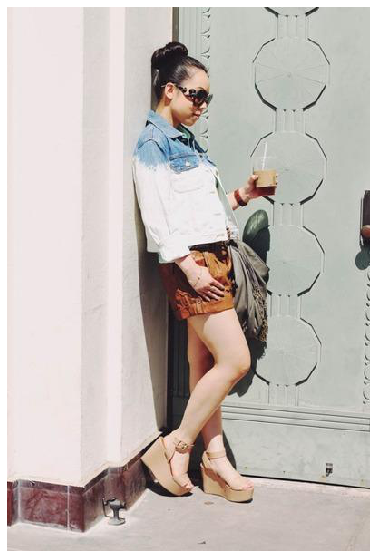

In [21]:
catIds = coco.getCatIds(catNms=['bag', 'belt', 'shorts'])
imgIds = coco.getImgIds(catIds=catIds)
# print(len(imgIds))
# imgIds = coco.getImgIds(imgIds=[4158])
# print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
img_name,img_type = img['file_name'].split('.')
name = str(int(img_name)) + '.' + img_type
I = io.imread('/home/omnisky/_disk/chengming/modanet-master/annotations/image/%s'%(name))
plt.axis('off')
plt.imshow(I)
plt.show

[263608, 263609, 263610]
<class 'list'>


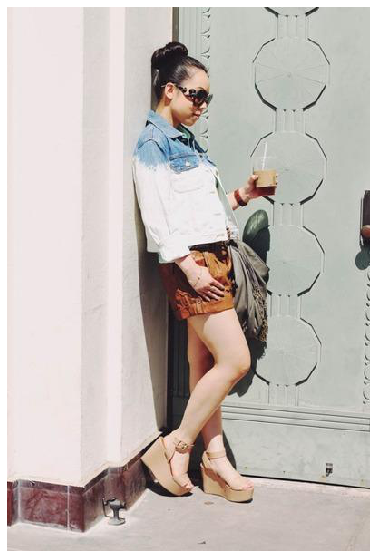

In [53]:
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(type(anns))
# coco.showAnns(anns)
# plt.show()

[[185, 81, 195, 87, 204, 87, 215, 90, 222, 97, 227, 95, 224, 107, 218, 107, 214, 101, 208, 109, 200, 102, 191, 96, 183, 87]]
1


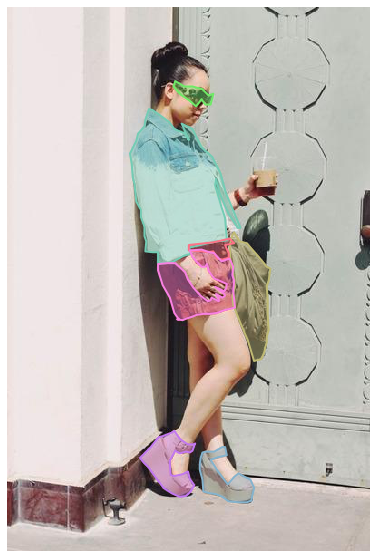

In [97]:
plt.imshow(I); plt.axis('off') 
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None) 
anns = coco.loadAnns(annIds) 
masks = [] 
showonce = True 
for ann in anns:
    if type(ann['segmentation']) == list and showonce: 
        print(ann['segmentation'])
        print(1)
        showonce = False 
    if type(ann['segmentation']) != list: 
        print(ann['segmentation']) 
        print(2)
    m = coco.annToMask(ann)
    m = m * ann['category_id']
    masks.append(m) 
coco.showAnns(anns)

In [107]:
print(masks[0].shape)
seg = np.zeros((600, 400))
for mask in masks:
#     print(np.unique(mask))
    seg += mask

(600, 400)


In [86]:
a = [1, 2, 3]
print(type(a))
print(a * 2)

<class 'list'>
[1, 2, 3, 1, 2, 3]


In [96]:
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None) 
anns = coco.loadAnns(annIds) 
print(len(anns))
# print(img['id'])

7


In [99]:
imgIds = coco.getImgIds()
print(type(imgIds))
print(len(imgIds))

<class 'list'>
52377
